The task is to monitor the value of three hierarchy measures as functions of the average degree around the critical point of the percolation using numerical simulations. Since the structure of the giant component is tree-like in the undirected E-R graph at the critical point, and trees are highly hierarchical objects, it is an interesting question whether we observe any peaks in the hierarchy measures for the directed E-R graph at the percolation transition?

In [2]:
import igraph as ig
from time import sleep

In [3]:
def in_giant(G):
    cl = G.components()
    cl_sizes = cl.sizes()
    giant_component_index = cl_sizes.index(max(cl_sizes))
    return [x == giant_component_index for x in cl.membership]

def giant_size(G):
    cl = G.components()
    cl_sizes = cl.sizes()
    return max(cl_sizes)

def bi_color_graph(Gr,node_color,node_lst):
    layout = Gr.layout("kk")
    visual_style = {}
    visual_style["vertex_label"] = Gr.vs["name"]
    color = ['green' if item in node_color else 'red' for item in node_lst]
    visual_style["vertex_color"] = color
    visual_style["layout"] = layout
    visual_style["bbox"] = (300, 300)
    visual_style["margin"] = 20
    return visual_style

def nodes_n_cycle(G):
    '''
    This function applies the algorithm to count the number of nodes participating in 
    a cycle from a graph. IMPORTANT: The name attribute has been added to nodes. 
    The label of each node is changed in every graph to have it continuous. Thus the name
    attribute will help me to keep track of nodes identity with respect to the original 
    graph. This is just for visualization it plays no role in the algorithm.
    '''
    node_list = list(G.vs.indices)
    in_list = g.indegree()
    out_list = g.outdegree()
    out_node = [counter for counter,value in enumerate(out_list) if value>0]
    in_node = [counter for counter,value in enumerate(in_list) if value>0]
    temp = set(in_node)
    tot_node = [value for value in out_node if value in temp] 
    new_ver = g.vs.select(tot_node)
    vs_s = bi_color_graph(g,tot_node,node_list)
    g_i = g.subgraph(tot_node)
    num_remove = len(node_list)-len(tot_node)
    return vs_s, g_i, num_remove

12


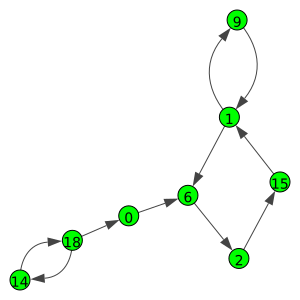

In [6]:
g = ig.Graph.Erdos_Renyi(20, 0.05, directed=True, loops=False)
g.vs['name'] = [str(i) for i in range(20)]

tot_rem = 0
n_rem = 1
while n_rem > 0 :
    vis_s , g , n_rem = nodes_n_cycle(g)
    tot_rem += n_rem
print(tot_rem)
ig.plot(g,**vis_s)

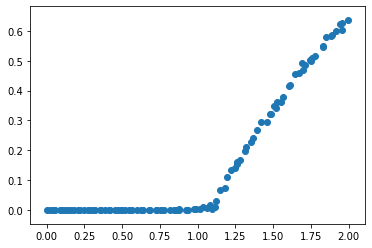

In [6]:
num_nodes = int(5e3)
rel_s = []
mean_d = []
for i in np.linspace(0,2*(1/num_nodes),int(1e2)):
    g = ig.Graph.Erdos_Renyi(num_nodes, i, directed=True, loops=False)
    mean_d.append(ig.mean(g.indegree()))
    giant_s = giant_size(g)
    rel_s.append(giant_s/num_nodes)

plt.scatter(mean_d,rel_s)

In [27]:
ig.summary(g)
print(g.components())
g.vs["color"]=['red','blue','green','red','black','blue','pink','red','green']

IGRAPH UN-- 10 4 -- 
+ attr: color (v), name (v)
[1, 2, 2, 2, 1, 2]
